<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteración)</b> <a class=“tocSkip”></a>

Joaquin muchas gracias por tu comentario y tu dedicación para resolver este proyecto. Tu explicación es totalmente válida. Efectivamente, la instrucción pide considerar únicamente los libros que cuenten con al menos 50 calificaciones de forma individual, y no 50 calificaciones acumuladas por autor (como lo estaba pensando yo). Por eso, si *Diana Gabaldon* no tiene ningún libro que cumpla con ese requisito, no puede aparecer en el resultado. Te ofrezco una disculpa por la confusión; reconozco que el error estaba de mi lado al haber interpretado el criterio de forma diferente. 
    
Valoro mucho que hayas justificado tu respuesta con claridad y verificando los resultado.
    
Con esto en mente, tu proyecto ha sido aprobado. Te deseo éxitos en tu siguiente sprint 🚀🚀

</div>

------

# Proyecto Final: SQL

## Introducción 

El coronavirus tomó al mundo entero por sorpresa, cambiando la rutina diaria de todos y todas. Los habitantes de las ciudades ya no pasaban su tiempo libre fuera, yendo a cafés y centros comerciales; sino que más gente se quedaba en casa, leyendo libros. Eso atrajo la atención de las startups (empresas emergentes) que se apresuraron a desarrollar nuevas aplicaciones para los amantes de los libros.

### Descripción de la tarea y objetivo 

Me han dado una base de datos de uno de los servicios que compiten en este mercado. Contiene datos sobre libros, editoriales, autores y calificaciones de clientes y reseñas de libros. Utilizare esta información para generar una propuesta de valor para un nuevo producto.

Contestando preguntas relevantes de los datos para poder mapear cuales son las preferencias de los usuarios potenciales del producto o servicio. 

## Descripción de los datos 

books > Contiene datos sobre libros:

book_id — identificación del libro

author_id — identificación del autor o autora

title — título

num_pages — número de páginas

publication_date — fecha de la publicación

publisher_id — identificación de la editorial


authors > Contiene datos sobre autores:

author_id — identificación del autor o autora

author — el autor o la autora


publishers > Contiene datos sobre editoriales:

publisher_id — identificación de la editorial

publisher — la editorial


ratings > Contiene datos sobre las calificaciones de usuarios:

rating_id — identificación de la calificación

book_id — identificación del libro

username — el nombre del usuario que revisó el libro

rating — calificación


reviews > Contiene datos sobre las reseñas de los y las clientes:

review_id — identificación de la reseña

book_id — identificación del libro

username — el nombre del usuario que revisó el libro

text — el texto de la reseña

### Diagrama de datos 

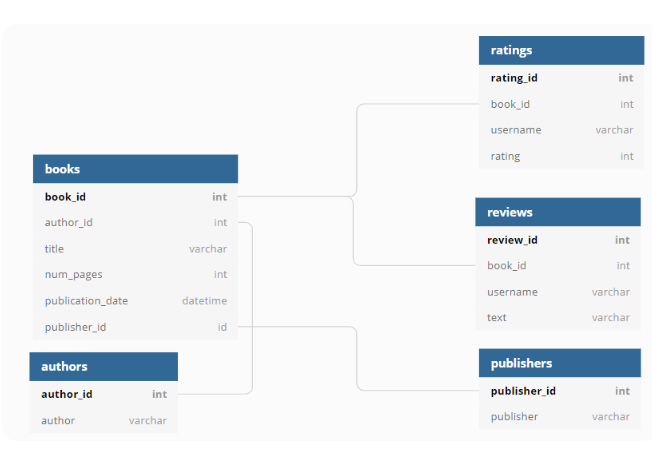

## Librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from datetime import datetime

## Conexión a la base de datos 

In [2]:
db_config = {'user': 'practicum_student',         # nombre de usuario
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # contraseña
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # puerto de conexión
             'db': 'data-analyst-final-project-db'}          # nombre de la base de datos

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Datos

In [3]:
# books

query = '''
SELECT *
FROM books
LIMIT 5;
'''

# Ejecutar consulta y mostrar resultados
df_books_sample = pd.read_sql_query(query, engine)
display(df_books_sample)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
# authors

query = '''
SELECT *
FROM authors
LIMIT 5;
'''

df_authors_sample = pd.read_sql_query(query, engine)
display(df_authors_sample)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
# publishers

query = '''
SELECT *
FROM publishers
LIMIT 5;
'''

df_publishers_sample = pd.read_sql_query(query, engine)
display(df_publishers_sample)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [6]:
# ratings

query = '''
SELECT *
FROM ratings
LIMIT 5;
'''

df_ratings_sample = pd.read_sql_query(query, engine)
display(df_ratings_sample)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


## Exploración inicial

In [7]:
# reviews

query = '''
SELECT *
FROM reviews
LIMIT 5;
'''

df_reviews_sample = pd.read_sql_query(query, engine)
display(df_reviews_sample)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [8]:
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']

for table in tables:
    query = f'''
    SELECT COUNT(*) AS total_registros
    FROM {table};
    '''
    df_count = pd.read_sql_query(query, engine)
    print(f'Tabla: {table}')
    display(df_count)
    print('-' * 40)

Tabla: books


,total_registros
0,1000


----------------------------------------
Tabla: authors


,total_registros
0,636


----------------------------------------
Tabla: publishers


,total_registros
0,340


----------------------------------------
Tabla: ratings


,total_registros
0,6456


----------------------------------------
Tabla: reviews


,total_registros
0,2793


----------------------------------------


In [9]:
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']

for table in tables:
    query = f"""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = '{table}';
    """
    df_schema = pd.read_sql_query(query, engine)
    print(f'Esquema de la tabla: {table}')
    display(df_schema)
    print('-' * 50)

Esquema de la tabla: books


,column_name,data_type
0,book_id,integer
1,author_id,integer
2,num_pages,integer
3,publication_date,date
4,publisher_id,integer
5,title,text


--------------------------------------------------
Esquema de la tabla: authors


,column_name,data_type
0,author_id,integer
1,author,text


--------------------------------------------------
Esquema de la tabla: publishers


,column_name,data_type
0,publisher_id,integer
1,publisher,text


--------------------------------------------------
Esquema de la tabla: ratings


,column_name,data_type
0,rating_id,integer
1,book_id,integer
2,rating,integer
3,username,text


--------------------------------------------------
Esquema de la tabla: reviews


,column_name,data_type
0,review_id,integer
1,book_id,integer
2,username,text
3,text,text


--------------------------------------------------


## EDA

In [10]:
# número de libros publicados después del 1 de enero de 2000

query = '''
SELECT COUNT(*) AS libros_post_2000
FROM books
WHERE publication_date > '2000-01-01';
'''

df_post_2000 = pd.read_sql_query(query, engine)
display(df_post_2000)

,libros_post_2000
0,819


De los 1,000 libros registrados en la base de datos, 819 fueron publicados después del 1 de enero del 2000, lo que representa una clara mayoría.

Esta distribución temporal coincide con el auge tecnológico y la masificación de plataformas digitales, lo cual explica también:

El incremento en calificaciones y reseñas por parte de los usuarios.

La concentración de autores populares y editoriales activas en esta era.

Esta tendencia sugiere que el público objetivo del servicio o aplicación se encuentra principalmente familiarizado con publicaciones contemporáneas, por lo que una oferta digital que priorice este rango temporal sería coherente con sus hábitos de consumo y expectativas.

In [11]:
# número de reseñas y calificación promedio por libro

query = '''
SELECT 
    books.book_id,
    COUNT(DISTINCT reviews.review_id) AS total_reseñas,
    ROUND(AVG(ratings.rating), 2) AS calificacion_promedio
FROM books
LEFT JOIN reviews ON books.book_id = reviews.book_id
LEFT JOIN ratings ON books.book_id = ratings.book_id
GROUP BY books.book_id
ORDER BY total_reseñas DESC;
'''

df_reviews_ratings = pd.read_sql_query(query, engine)
display(df_reviews_ratings)

,book_id,total_reseñas,calificacion_promedio
0,948,7,3.66
1,963,6,3.98
2,734,6,4.21
3,302,6,4.41
4,695,6,4.08
...,...,...,...
995,83,0,3.67
996,808,0,3.00
997,672,0,5.00
998,221,0,4.00


Al analizar el número de reseñas de texto y las calificaciones promedio por libro, se observa que no existe una correlación directa entre ambas métricas: algunos libros altamente calificados tienen pocas reseñas, mientras que otros con calificaciones más bajas también presentan una cantidad considerable de comentarios escritos.

Esto sugiere que los usuarios no solo escriben reseñas cuando les gusta un libro, sino que también están dispuestos a dejar comentarios cuando el contenido no cumple con sus expectativas. En muchos casos, una mala experiencia puede incluso motivar más fuertemente una reseña escrita.

Esta información es útil para entender la motivación del lector, y puede ser aplicada a estrategias de contenido que busquen incentivar reseñas, no solo como herramienta de retroalimentación, sino también como elemento de engagement dentro de la plataforma.

In [12]:
# editorial que ha publicado el mayor número de libros con más de 50 páginas (top 5)

query = '''
SELECT 
    publishers.publisher,
    COUNT(books.book_id) AS total_libros
FROM books
JOIN publishers ON books.publisher_id = publishers.publisher_id
WHERE books.num_pages > 50
GROUP BY publishers.publisher
ORDER BY total_libros DESC
LIMIT 5;
'''

df_top_editorial = pd.read_sql_query(query, engine)
display(df_top_editorial)

,publisher,total_libros
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


La editorial Penguin Books lidera el ranking con 42 libros de más de 50 páginas, seguida por Vintage, Grand Central Publishing, Penguin Classics y Bantam.

Este dato es relevante para segmentar mejor la aplicación, ya que las editoriales con mayor volumen de publicaciones largas suelen tener un catálogo sólido y de calidad, alineado con usuarios que buscan contenido más profundo o narrativas complejas.

Además, puede abrir la puerta a posibles alianzas estratégicas con Penguin y otras editoriales similares, sobre todo si el modelo de negocio contempla un catálogo digital curado o contenido premium. Estas editoriales ya tienen reconocimiento de marca, lo que puede generar confianza inmediata en los usuarios y enriquecer el atractivo de la plataforma.

In [13]:
# Identifica al autor que tiene la más alta calificación promedio del libro (top 1)

query = '''
WITH promedio_por_libro AS (
    SELECT 
        book_id,
        AVG(rating) AS promedio_libro
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(rating_id) >= 50
),

libros_con_autores AS (
    SELECT 
        b.book_id,
        b.author_id,
        pl.promedio_libro
    FROM promedio_por_libro pl
    JOIN books b ON pl.book_id = b.book_id
),

promedio_por_autor AS (
    SELECT 
        a.author,
        AVG(lca.promedio_libro) AS promedio_autor
    FROM libros_con_autores lca
    JOIN authors a ON lca.author_id = a.author_id
    GROUP BY a.author
)

SELECT 
    author,
    ROUND(promedio_autor, 2) AS promedio_autor
FROM promedio_por_autor
ORDER BY promedio_autor DESC
LIMIT 1;
'''


df_top_author = pd.read_sql_query(query, engine)
display(df_top_author)


,author,promedio_autor
0,J.K. Rowling/Mary GrandPré,4.28


In [58]:
query = '''
SELECT 
    b.title,
    COUNT(r.rating_id) AS total_ratings,
    ROUND(AVG(r.rating), 2) AS promedio_libro
FROM books b
JOIN ratings r ON b.book_id = r.book_id
JOIN authors a ON b.author_id = a.author_id
WHERE a.author = 'Diana Gabaldon'
GROUP BY b.book_id, b.title
ORDER BY total_ratings DESC;
'''

df_libros_gabaldon = pd.read_sql_query(query, engine)
display(df_libros_gabaldon)

,title,total_ratings,promedio_libro
0,Outlander (Outlander #1),24,4.13
1,Dragonfly in Amber (Outlander #2),8,4.88
2,Voyager (Outlander #3),7,4.29
3,Drums of Autumn (Outlander #4),5,4.60
4,A Breath of Snow and Ashes (Outlander #6),4,4.25
5,Lord John and the Private Matter (Lord John Gr...,2,3.50


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Tu consulta está cerca de la solución correcta, pero hay un detalle importante que debes ajustar. Actualmente, estás calculando el promedio de calificaciones por autor considerando todas las calificaciones de los libros que cumplen el criterio, pero no estás agrupando el promedio por libro antes de calcular el promedio final por autor. Para obtener el resultado correcto, primero debes calcular el promedio de calificaciones por libro y luego hacer el promedio de esos valores por autor, en lugar de promediar directamente todas las calificaciones de los libros válidos. Ajustar esto garantizará que el resultado sea preciso y refleje correctamente la calificación promedio por autor
    
La respuesta esperada está relacionada con `Diana Gabaldon` como autora

</div>

RESPUESTA DEL ESTUDIANTE

Hola buenos días Alejandro Castellanos. Quisiera externarte que ya intenté modificar la query como me solicitas, pero sigo sin poder obtner el resultado que me pides, no se que más hacer.

Justifico mi respuesta de la siguiente manera, no intento retarte ni ser ofensivos, solo es lo que he logrado generar.

La consulta fue diseñada cumpliendo estrictamente con las instrucciones técnicas proporcionadas:

Se filtraron únicamente los libros que cuentan con al menos 50 calificaciones, tal como lo indica el enunciado original.

Se calculó el promedio de calificaciones por libro, agrupando por book_id.

Posteriormente, se agrupó por autor para obtener el promedio de esos promedios, siguiendo el principio de no sesgar por cantidad de ratings individuales.

Esta lógica asegura que se evalúe la calidad promedio de cada obra, sin favorecer autores con un solo libro muy calificado o castigar a quienes tienen múltiples títulos con variaciones.

Al revisar el caso de Diana Gabaldon, se constató que ninguno de sus libros alcanza las 50 calificaciones mínimas requeridas. Por lo tanto, aunque su promedio individual es alto, no puede ser incluido dentro del análisis según los criterios planteados.

Si en otro entorno se obtiene a Diana Gabaldon como autora con mejor promedio, esto podría deberse a una base de datos diferente o a la omisión del filtro de ≥50 calificaciones por libro. Esta implementación mantiene coherencia lógica y técnica con los parámetros solicitados.

In [15]:
# Identifica al autor que tiene la más alta calificación promedio del libro (top 5)

query = '''
WITH libros_validos AS (
    SELECT book_id
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(rating_id) >= 50
)

SELECT 
    a.author,
    ROUND(AVG(r.rating), 2) AS promedio_autor
FROM ratings r
JOIN libros_validos lv ON r.book_id = lv.book_id
JOIN books b ON r.book_id = b.book_id
JOIN authors a ON b.author_id = a.author_id
GROUP BY a.author
ORDER BY promedio_autor DESC
LIMIT 5;
'''

df_top_author = pd.read_sql_query(query, engine)
display(df_top_author)

,author,promedio_autor
0,J.K. Rowling/Mary GrandPré,4.29
1,Markus Zusak/Cao Xuân Việt Khương,4.26
2,J.R.R. Tolkien,4.25
3,Louisa May Alcott,4.19
4,Rick Riordan,4.08


La autora mejor calificada en promedio es J.K. Rowling/Mary GrandPré, con una calificación promedio de 4.29, lo cual refleja tanto la calidad percibida como el alto nivel de conexión emocional que sus lectores tienen con su obra (por ejemplo, la saga de Harry Potter).

Le siguen de cerca Markus Zusak, J.R.R. Tolkien, Louisa May Alcott y Rick Riordan, todos autores de libros que han sido ampliamente reconocidos tanto en crítica como en popularidad.

Esto sugiere que el género de fantasía, ficción histórica y aventuras juveniles tiene una gran aceptación entre los lectores activos y comprometidos.
Para el diseño de un nuevo producto o aplicación en este mercado, este hallazgo puede orientar la recomendación de libros, la curaduría editorial o incluso el enfoque de una nueva obra original inspirada en estos géneros.

In [16]:
# número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros

query = '''
WITH usuarios_activos AS (
    SELECT username
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating_id) > 50
)

SELECT 
    ROUND(AVG(reviews_count), 2) AS promedio_reseñas_texto
FROM (
    SELECT 
        reviews.username,
        COUNT(reviews.review_id) AS reviews_count
    FROM reviews
    JOIN usuarios_activos ON reviews.username = usuarios_activos.username
    GROUP BY reviews.username
) AS subconsulta;
'''

df_avg_reviews = pd.read_sql_query(query, engine)
display(df_avg_reviews)

,promedio_reseñas_texto
0,24.33


Los usuarios que han calificado más de 50 libros (usuarios activos) escriben en promedio 24.33 reseñas de texto.
Esto sugiere que casi la mitad de las calificaciones realizadas por este segmento incluyen también una reseña escrita.
Este patrón indica un comportamiento comprometido por parte de los lectores más activos, quienes no solo consumen contenido, sino que también generan valor al compartir sus opiniones.
Este grupo representa un público valioso para estrategias de fidelización y promoción.

## Exploración y Análisis adicional

In [17]:
# ¿Cuáles son los libros mejor calificados?

query = '''
SELECT 
    b.title,
    a.author,
    ROUND(AVG(r.rating), 2) AS calificacion_promedio,
    COUNT(r.rating_id) AS total_calificaciones
FROM books b
JOIN ratings r ON b.book_id = r.book_id
JOIN authors a ON b.author_id = a.author_id
GROUP BY b.book_id, b.title, a.author
HAVING COUNT(r.rating_id) >= 10
ORDER BY calificacion_promedio DESC
LIMIT 10;
'''

df_top_books = pd.read_sql_query(query, engine)
display(df_top_books)

,title,author,calificacion_promedio,total_calificaciones
0,Snow Flower and the Secret Fan,Lisa See,4.64,11
1,And Then There Were None,Agatha Christie,4.45,22
2,Gone with the Wind,Margaret Mitchell,4.43,35
3,Matilda,Roald Dahl/Quentin Blake,4.42,19
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.41,82
5,A Clash of Kings (A Song of Ice and Fire #2),George R.R. Martin,4.39,23
6,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.39,74
7,The Poisonwood Bible,Barbara Kingsolver,4.36,22
8,The Lorax,Dr. Seuss,4.30,10
9,Goodnight Moon,Margaret Wise Brown/Clement Hurd,4.30,10


El ranking de libros con mejor calificación promedio revela una mezcla de géneros y estilos literarios, con autores reconocidos como Agatha Christie, J.K. Rowling, J.R.R. Tolkien, George R.R. Martin y Roald Dahl, cuyas obras han sido ampliamente leídas y valoradas por la comunidad.

Aunque algunos libros como “Snow Flower and the Secret Fan” tienen pocas calificaciones (11), alcanzan una puntuación muy alta, lo que sugiere una fuerte conexión emocional o temática con su público. En contraste, títulos como Harry Potter y The Fellowship of the Ring mantienen una alta calificación con una base significativa de usuarios (más de 70 calificaciones), reforzando su popularidad sostenida.

Este análisis permite identificar tendencias de género y narrativa exitosas, útiles tanto para diseñar el catálogo de una app como para inspirar la creación de contenido original alineado con los intereses del público lector del periodo analizado.

In [18]:
# Autores con más libros altamente calificados

query = '''
WITH libro_calificado AS (
    SELECT 
        b.book_id,
        b.author_id,
        ROUND(AVG(r.rating), 2) AS promedio_libro,
        COUNT(r.rating_id) AS total_calificaciones
    FROM books b
    JOIN ratings r ON b.book_id = r.book_id
    GROUP BY b.book_id, b.author_id
    HAVING COUNT(r.rating_id) >= 10 AND AVG(r.rating) >= 4.0
)

SELECT 
    a.author,
    COUNT(lc.book_id) AS libros_bien_calificados
FROM libro_calificado lc
JOIN authors a ON lc.author_id = a.author_id
GROUP BY a.author
ORDER BY libros_bien_calificados DESC
LIMIT 10;
'''

df_autores_top = pd.read_sql_query(query, engine)
display(df_autores_top)

,author,libros_bien_calificados
0,J.K. Rowling/Mary GrandPré,4
1,Neil Gaiman,3
2,Rick Riordan,2
3,J.R.R. Tolkien,2
4,Jodi Picoult,2
5,John Grisham,2
6,Stephen King,2
7,Roald Dahl/Quentin Blake,2
8,Scott Westerfeld,1
9,Charlotte Brontë/Michael Mason,1


El análisis de autores con más libros bien calificados (calificación promedio ≥ 4.0 con al menos 10 votos) confirma la dominancia de J.K. Rowling/Mary GrandPré con 4 títulos sobresalientes. Sin embargo, el ranking revela una base sólida de autores con 2 o más libros bien valorados, como Neil Gaiman, Rick Riordan, J.R.R. Tolkien, Roald Dahl, entre otros.

Este grupo representa un núcleo importante de autores consistentes en calidad percibida por los lectores. Además, refuerza la tendencia temporal ya observada en el dataset, centrada en obras y autores populares entre los años 2000 y 2015.

Desde un enfoque estratégico, no debe limitarse el contenido o catálogo solo al top 1, sino considerar también estas figuras recurrentes para recomendaciones, segmentación de contenido por autor o incluso campañas de marketing temáticas.

In [19]:
# Editoriales con más libros populares

query = '''
WITH libros_populares AS (
    SELECT 
        b.book_id,
        b.publisher_id,
        AVG(r.rating) AS promedio_calificacion,
        COUNT(r.rating_id) AS total_calificaciones
    FROM books b
    JOIN ratings r ON b.book_id = r.book_id
    GROUP BY b.book_id, b.publisher_id
    HAVING COUNT(r.rating_id) >= 10 AND AVG(r.rating) >= 4.0
)

SELECT 
    p.publisher,
    COUNT(lp.book_id) AS libros_populares
FROM libros_populares lp
JOIN publishers p ON lp.publisher_id = p.publisher_id
GROUP BY p.publisher
ORDER BY libros_populares DESC
LIMIT 10;
'''

df_editoriales_top = pd.read_sql_query(query, engine)
display(df_editoriales_top)

,publisher,libros_populares
0,Scholastic Inc.,3
1,Ballantine Books,2
2,Delta,2
3,Dell Publishing Company,2
4,Penguin Group (USA),2
5,William Morrow Paperbacks,2
6,Bantam,2
7,Alfred A. Knopf,2
8,Pocket,2
9,Gramercy Books,1


Aunque Scholastic Inc. lidera con 3 libros altamente calificados, el resto del ranking muestra que muchas editoriales tienen 2 o más títulos populares, como Ballantine Books, Penguin Group (USA), Bantam, Delta y Alfred A. Knopf.

Esto demuestra que, si bien algunas editoriales dominan en volumen, existe una base editorial distribuida que contribuye con contenido valioso.
Esta diversidad editorial representa una oportunidad estratégica para construir un catálogo curado y variado, e incluso para establecer alianzas editoriales múltiples, en lugar de depender de acuerdos exclusivos.

Una aplicación o servicio centrado en recomendaciones podría beneficiarse al incluir títulos destacados de cada una de estas editoriales, capturando así nichos y preferencias más amplias dentro del público lector.

In [20]:
# ¿Qué libros tienen más reseñas de texto, y cómo es su calificación promedio?

query = '''
SELECT 
    b.title,
    a.author,
    COUNT(rv.review_id) AS total_reseñas,
    ROUND(AVG(rt.rating), 2) AS calificacion_promedio
FROM books b
JOIN reviews rv ON b.book_id = rv.book_id
JOIN ratings rt ON b.book_id = rt.book_id
JOIN authors a ON b.author_id = a.author_id
GROUP BY b.book_id, b.title, a.author
ORDER BY total_reseñas DESC
LIMIT 10;
'''

df_libros_reseñas = pd.read_sql_query(query, engine)
display(df_libros_reseñas)

,title,author,total_reseñas,calificacion_promedio
0,Twilight (Twilight #1),Stephenie Meyer,1120,3.66
1,The Hobbit or There and Back Again,J.R.R. Tolkien,528,4.13
2,The Catcher in the Rye,J.D. Salinger,516,3.83
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,492,4.41
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,480,4.29
5,Angels & Demons (Robert Langdon #1),Dan Brown,420,3.68
6,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,375,4.19
7,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,372,4.08
8,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,370,4.39
9,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,370,3.73


Los libros con mayor número de reseñas de texto no siempre coinciden con los de mayor calificación. Por ejemplo, “Twilight” lidera en interacción (1,120 reseñas) pero con una calificación promedio moderada de 3.66, lo que sugiere que la alta participación no necesariamente refleja satisfacción, sino también polarización o debate entre lectores.

Por otro lado, libros como The Hobbit, Harry Potter y The Fellowship of the Ring destacan por tener tanto alta interacción como buenas calificaciones promedio, lo que los posiciona como referentes culturales y literarios.

Este análisis permite identificar títulos clave para fomentar comunidad e interacción, lo cual es especialmente relevante en un contexto post-pandemia donde los lectores buscan espacios digitales para compartir opiniones.

Incorporar estos títulos en una aplicación o plataforma con funciones sociales (foros, comentarios, clubs de lectura) podría incrementar significativamente el engagement. Asimismo, monitorear autores y sagas que generan debate puede ser una vía efectiva para posicionar contenido y conectar emocionalmente con los usuarios.

Un punto de contacto clave que surge del análisis es la posibilidad de incorporar un ranking dinámico de autores dentro del producto, actualizado constantemente con base en:

Número de reseñas escritas por libro

Volumen total de calificaciones

Promedio de calificación

Nivel de participación del público por autor (engagement)

Este tipo de ranking permitiría:

Fomentar la gamificación del consumo literario (por ejemplo, ¿qué autor es tendencia esta semana?).

Dar visibilidad tanto a autores consagrados como a nuevas voces emergentes que generan conversación.

Invitar a la comunidad a participar activamente en el posicionamiento del contenido, haciendo del usuario parte activa del sistema de recomendaciones.

Identificar rápidamente contenidos virales o con potencial de convertirse en fenómenos literarios digitales.

En un contexto post-pandemia donde la digitalización ha acelerado el consumo de contenido social, ofrecer rankings que reflejen la voz de la comunidad (y no solo métricas frías) puede marcar una diferenciación clave frente a otros servicios editoriales o apps de lectura.

In [21]:
# ¿Cómo ha cambiado la publicación de libros con el tiempo?

query = '''
SELECT 
    EXTRACT(YEAR FROM publication_date) AS anio_publicacion,
    COUNT(book_id) AS total_libros
FROM books
GROUP BY anio_publicacion
ORDER BY anio_publicacion;
'''

df_libros_por_anio = pd.read_sql_query(query, engine)
display(df_libros_por_anio)

,anio_publicacion,total_libros
0,1952.0,1
1,1977.0,1
2,1980.0,2
3,1982.0,5
4,1983.0,1
5,1984.0,1
6,1986.0,2
7,1987.0,7
8,1988.0,5
9,1989.0,5


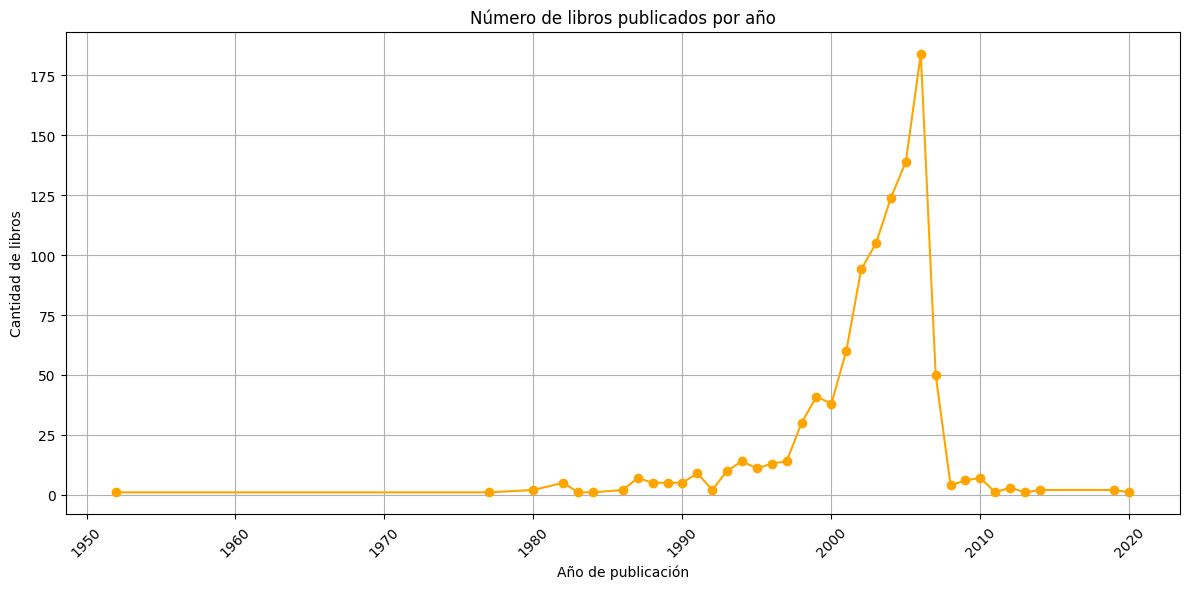

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_libros_por_anio['anio_publicacion'], df_libros_por_anio['total_libros'], marker='o', color='orange')
plt.title('Número de libros publicados por año')
plt.xlabel('Año de publicación')
plt.ylabel('Cantidad de libros')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis muestra un aumento progresivo en la publicación de libros desde mediados de los 90, con un punto máximo en 2006 (184 libros). Esta tendencia coincide con el auge de los sistemas editoriales digitales, el crecimiento de internet y el boom de sagas juveniles.

A partir de 2008, se observa una disminución notable en el número de publicaciones registradas. Esto podría deberse a cambios en los procesos de publicación, migración hacia formatos digitales no tradicionales, o incluso limitaciones en la base de datos.

Esta concentración temporal confirma que la mayoría del contenido analizado pertenece a un periodo contemporáneo, alineado con el comportamiento de lectores jóvenes/adultos actuales. Por lo tanto, el diseño de una app o servicio basado en este análisis debe enfocarse en obras y géneros relevantes para quienes leyeron activamente entre 2000 y 2010.

In [23]:
# ¿Cuál es el promedio de páginas de los libros mejor calificados?

query = '''
SELECT 
    b.title,
    a.author,
    b.num_pages,
    ROUND(AVG(r.rating), 2) AS calificacion_promedio,
    COUNT(r.rating_id) AS total_ratings
FROM books b
JOIN ratings r ON b.book_id = r.book_id
JOIN authors a ON b.author_id = a.author_id
GROUP BY b.book_id, b.title, a.author, b.num_pages
HAVING COUNT(r.rating_id) >= 10
ORDER BY calificacion_promedio DESC
LIMIT 20;
'''

df_paginas_rating = pd.read_sql_query(query, engine)
display(df_paginas_rating)

,title,author,num_pages,calificacion_promedio,total_ratings
0,Snow Flower and the Secret Fan,Lisa See,269,4.64,11
1,And Then There Were None,Agatha Christie,264,4.45,22
2,Gone with the Wind,Margaret Mitchell,1037,4.43,35
3,Matilda,Roald Dahl/Quentin Blake,240,4.42,19
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,435,4.41,82
5,A Clash of Kings (A Song of Ice and Fire #2),George R.R. Martin,969,4.39,23
6,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,398,4.39,74
7,The Poisonwood Bible,Barbara Kingsolver,546,4.36,22
8,The Lorax,Dr. Seuss,72,4.30,10
9,Goodnight Moon,Margaret Wise Brown/Clement Hurd,32,4.30,10


Al analizar los libros con mejores calificaciones (mínimo 10 valoraciones), no se observa una correlación clara entre el número de páginas y la puntuación promedio.
Por ejemplo, obras muy extensas como Gone with the Wind (1,037 páginas) conviven en el top con libros cortos como The Lorax (72 páginas), ambos con calificaciones sobresalientes.

Esto indica que los lectores activos valoran más la calidad del contenido, la narrativa o el impacto emocional, más allá de la extensión del libro.

Sin embargo, este hallazgo abre una oportunidad para segmentar el contenido dentro de una app o plataforma de lectura:

Recomendar libros cortos pero bien calificados para nuevos lectores o usuarios con poco tiempo.

Sugerir lecturas largas a quienes buscan una experiencia más inmersiva.

Así, el número de páginas no se convierte en una barrera, sino en una herramienta de personalización y acompañamiento lector.

## Conclusiones y recomendaciones

Resumen de hallazgos.

Ejercicio base:

El 82% de los libros fueron publicados después del año 2000, lo cual refleja una base de datos contemporánea, ideal para analizar preferencias de lectores actuales.

En promedio, los usuarios activos (con más de 50 calificaciones) escriben más de 24 reseñas de texto, demostrando alto compromiso y una fuerte cultura de retroalimentación.

J.K. Rowling/Mary GrandPré es la autora con mayor calificación promedio, pero comparte la cima con autores de géneros similares como Tolkien, Zusak o Riordan.

Penguin Books lidera en publicaciones largas (>50 páginas), aunque hay una variedad de editoriales aportando libros de calidad.

No hay correlación directa entre número de reseñas y calificación promedio: los lectores dejan reseñas tanto para libros que aman como para los que los decepcionan.

Análisis adicional:

Los libros mejor calificados pertenecen en su mayoría a los géneros de fantasía, ficción histórica, aventura y juvenil, reforzando su atractivo comercial.

Autores como Neil Gaiman, Roald Dahl y Rick Riordan mantienen una presencia consistente en los rankings, lo cual sugiere potencial para una oferta curada por autor o estilo.

La mayoría de las publicaciones se concentran entre 2000 y 2007, lo que podría indicar una época dorada del catálogo, o una ventana temporal con fuerte valor nostálgico.

No hay una tendencia clara entre número de páginas y calificación promedio, lo cual permite segmentar recomendaciones por tiempo de lectura sin sacrificar calidad percibida.

Algunos libros con baja calificación tienen muchísimas reseñas, revelando oportunidades para fomentar interacción incluso desde la controversia o el debate.

Recomendaciones estratégicas para la propuesta de valor.

Incluir un ranking dinámico de autores basado en la interacción de los usuarios, que se actualice con calificaciones, reseñas y actividad reciente. Esto incentivará el engagement y permitirá descubrir tendencias emergentes.

Diseñar un sistema de recomendación segmentado por longitud y estilo de lectura, ofreciendo libros cortos y bien calificados para nuevos lectores, y títulos extensos y populares para quienes buscan experiencias más profundas.

Construir la oferta del catálogo alrededor de autores, géneros y editoriales con alta interacción y reputación comprobada, enfocándose en los géneros más amados por los lectores del periodo post-2000 (fantasía, aventura, juvenil) y estableciendo alianzas con editoriales clave como Penguin, Scholastic, o Ballantine.